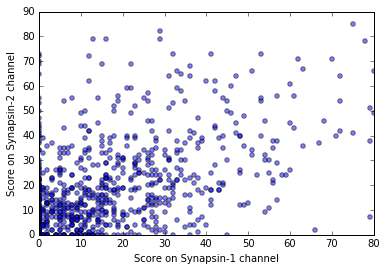

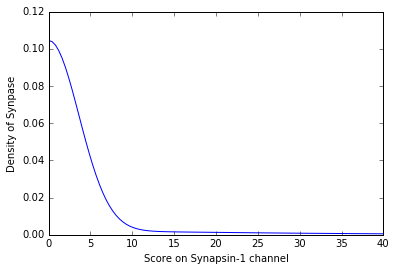

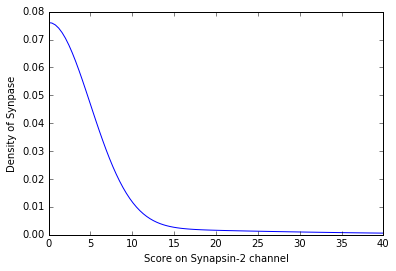

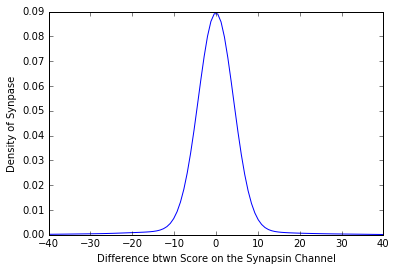

In [19]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import gaussian_kde


syn_positions = sio.loadmat('new_positions_data.mat')['syn']
sub_sample = np.random.permutation(len(syn_positions[:,0]))[1:10000]
synapsin1 = syn_positions[:,0].astype(float)
synapsin2 = syn_positions[:,1].astype(float)


plt.scatter(synapsin1[sub_sample], synapsin2[sub_sample], alpha=0.5)
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Score on Synapsin-2 channel")
plt.axis([0, 80, 0, 90])
plt.show()


density = gaussian_kde(synapsin1)
xs = np.linspace(0,40,100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Density of Synpase")

plt.show()

density = gaussian_kde(synapsin2)
xs = np.linspace(0,40,100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.xlabel("Score on Synapsin-2 channel")
plt.ylabel("Density of Synpase")

plt.show()

density = gaussian_kde(synapsin1[sub_sample] - synapsin2[sub_sample])
xs = np.linspace(-40,40,100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.ylabel("Density of Synpase")
plt.xlabel("Difference btwn Score on the Synapsin Channel")
plt.show()


As recommended during class last Thursday, we set the threshold incrementally to reject more and more synapses each time. Plotted above are the density graph of the synapses scores for the synpaeses positions evalutaed with a even more relaxed threshold. As expected, most synpaes have a score on the lower end of the specturm. (The score is generated using a self-defined metric that evluated the neighborhood of a called synpase in the pivot position file). As expected, a lot of synpases either have a high score on the synapsisn-1 images or the synapsin-2 iamges, as shown by the scatter graph.

In [21]:
import pickle
raw_data = pickle.load(open('raw_data'))

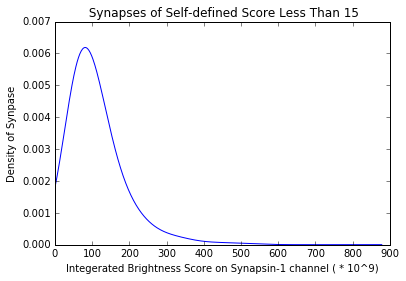

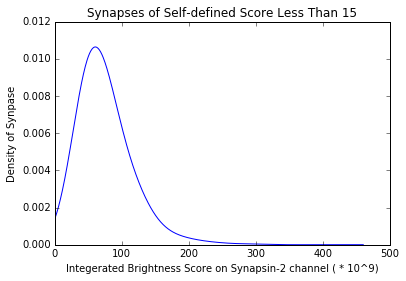

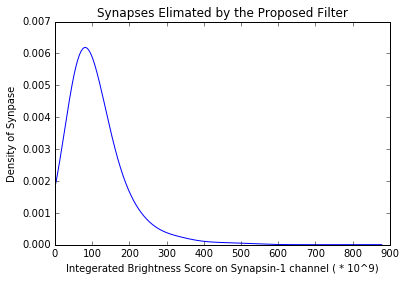

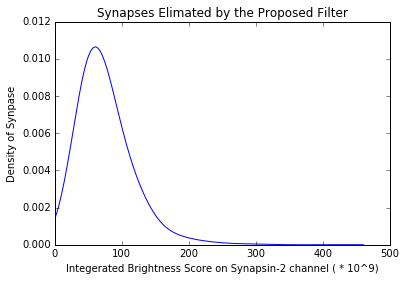

In [44]:
import statsmodels.api as sm
synapsin1_raw = np.array(raw_data[1])[0:1119259]
synapsin2_raw = np.array(raw_data[2])[0:1119259]
sub_sample = np.random.permutation(len(synapsin2_raw))[1:1000]

filter1 = synapsin1 > 15
synapsin1_raw_out = synapsin1_raw[filter]
density = gaussian_kde(synapsin1_raw_out/10000)
xs = np.linspace(0,max(synapsin1_raw_out)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title(" Synapses of Self-defined Score Less Than 15")
plt.xlabel("Integerated Brightness Score on Synapsin-1 channel ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()


filter1 = synapsin2 > 15
synapsin2_raw_out = synapsin2_raw[filter]
density = gaussian_kde(synapsin2_raw_out/10000)
xs = np.linspace(0,max(synapsin2_raw_out)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title("Synapses of Self-defined Score Less Than 15")
plt.xlabel("Integerated Brightness Score on Synapsin-2 channel ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()

filter1 = (abs(synapsin1 - synapsin2) > 5) | (synapsin1 < 15) & (synapsin2 < 15)


synapsin1_raw_out = synapsin1_raw[filter]
density = gaussian_kde(synapsin1_raw_out/10000)
xs = np.linspace(0,max(synapsin1_raw_out)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title("Synapses Elimated by the Proposed Filter")
plt.xlabel("Integerated Brightness Score on Synapsin-1 channel ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()



synapsin2_raw_out = synapsin2_raw[filter]
density = gaussian_kde(synapsin2_raw_out/10000)
xs = np.linspace(0,max(synapsin2_raw_out)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title("Synapses Elimated by the Proposed Filter")
plt.xlabel("Integerated Brightness Score on Synapsin-2 channel ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()




We look at the integrated brighness score of the synapses that would be taken out by threshdoling on the score dervived from the evauluation of them on the raw images. Most of the synapses have integrated brightness score on the lower spectrum. The porposed filter was the filter used in the last assignment where a synapse would be taken out if its score across the two synapsin channels are too different. 

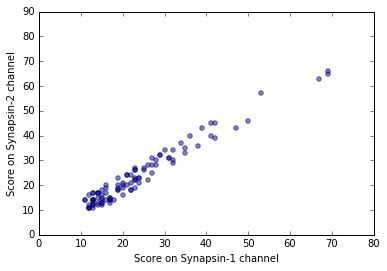

In [57]:
filter = (abs(synapsin1 - synapsin2) < 5) & (synapsin1 > 20) & (synapsin2 > 20)


synapsin1_sub = synapsin1[filter]
synapsin2_sub = synapsin2[filter]

sub_sample = np.random.permutation(len(synapsin1_sub))[1:100]

plt.scatter(synapsin1_sub[sub_sample], synapsin2_sub[sub_sample], alpha=0.5)
plt.xlabel("Score on Synapsin-1 channel")
plt.ylabel("Score on Synapsin-2 channel")
plt.axis([0, 80, 0, 90])
plt.show()


Last week we propose to build a filter that only keeps the synapse where the score for each of them based on the raw image across the two synapsin channel is consistent.

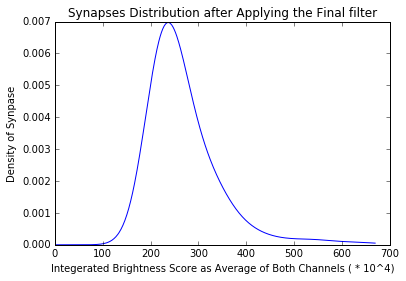

207.453458172 8.95475961589e-46


In [58]:
synapsin_average = (synapsin1_raw + synapsin2_raw) / 2
synapsin_filtered = synapsin_average[filter]
synapsin_filtered = synapsin_filtered[synapsin_filtered > 2000000 ] 


density = gaussian_kde(synapsin_filtered/10000)
xs = np.linspace(0,max(synapsin_filtered)/10000,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title("Synapses Distribution after Applying the Final filter")
plt.xlabel("Integerated Brightness Score as Average of Both Channels ( * 10^4)")
plt.ylabel("Density of Synpase")
plt.show()

import scipy.stats as stats
k2, p = stats.normaltest(synapsin_filtered, axis=0)
print k2, p

After thresholding based on infroamtion form the raw images, also thresholding on Integrated Brightness by first taking the average between the two synapsin channels then applying a high-pass filter. The distribution of the synapses look less skewed to the left. 